# Exploring Income Classification Using the 1994 Census Income Data Set <br>


## Task 1 – Story <br>


In the realm of data exploration lies a captivating journey awaiting those who seek to unravel the intricate patterns hidden within the Census Income Data Set. Armed with a dataset sourced from the 1994 census, our quest is to delve into the realm of clustering and dimension reduction, aiming to extract meaningful insights regarding income distribution and its underlying factors.

Our journey commences with the meticulous preparation of the dataset, meticulously curated with 32,500 instances brimming with attributes like age, education, occupation, and more. Each data point represents an individual, their socio-economic background, and their annual income, creating a rich tapestry of information ripe for exploration.

As we embark on our expedition, the first waypoint is `clustering` - a technique that groups similar data points together, unveiling inherent structures within the dataset. By applying clustering algorithms such as `k-means` and `EM`, we aim to identify distinct cohorts within the population based on shared characteristics. Are there discernible clusters of individuals with similar income levels, education backgrounds, or occupational profiles? Our journey through clustering promises to unveil these hidden groupings, shedding light on the diverse socio-economic landscape captured by the dataset.

However, our exploration does not end here. To gain deeper insights and facilitate better visualization, we venture further into the realm of `dimension reduction`. This technique allows us to compress the dataset's high-dimensional space into a more manageable form while preserving essential information. Through methods like principal component analysis (PCA), we aim to distill the complex relationships between attributes into a simplified representation. By reducing dimensionality, we gain a clearer understanding of the dataset's underlying structure and uncover previously unseen patterns.

As our journey unfolds, each algorithm, each visualization, and each insight brings us closer to unraveling the mysteries of income distribution within the Census Income Data Set. From identifying distinct clusters of individuals with similar socio-economic profiles to revealing the most influential factors shaping income levels, our exploration transcends mere data analysis - it becomes a narrative of discovery, enlightenment, and understanding.

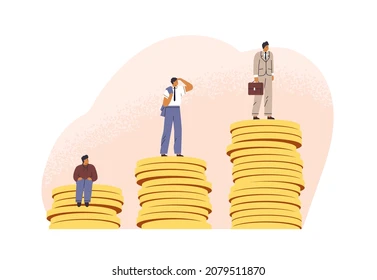

In the end, our story is not just about numbers and algorithms; it's about the people behind the data, their aspirations, challenges, and triumphs. Through clustering and dimension reduction, we strive to illuminate their stories, offering valuable insights that can inform policy-making, empower decision-makers, and ultimately, shape a brighter future for all.


## Task 2 – The Data <br>

The dataset of *Census Income* has been extracted online from *Data World* [https://data.world/uci/census-income]. This data has been published on December 2016 by UCI. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: $((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))$

This dataset is especially used for the purpose of Multivariate, Machine Learning, Classification.

In [1]:
''' Import Libraries
'''
import pandas as pd
import numpy as np

In [2]:
''' Read the Data File in Panda DataFrame
'''
# Load the Excel file into a Pandas DataFrame
df = pd.read_csv('adult.data.csv')
df.head()

Age          Workclass  fnlwgt   Education  Education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        Marital-status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital-gain  Capital-loss  Hours-per-week  Native-country Class-of-wage  
0          2174             0              40   United-States         <=50K  
1             0             0              13   United-States         <=50K  
2             0             0              40   United-States         <=50K  
3             0             0              40   United-States         <=50K  
4             0             0              40            Cuba         <=50K

In [3]:
''' Shape & Total Length of Dataset
'''
print ('Shape of Dataset : ',df.shape, ' & the total length of data : ', len(df))

Shape of Dataset :  (32561, 15)  & the total length of data :  32561


In [4]:
''' The attributes within Dataset
'''
print (df.columns)

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Class-of-wage'],
      dtype='object')


Each attribute in a dataset plays a crucial role in solving the task of predicting whether an adult's income exceeds $50,000 per year. Here's how each attribute contributes:

1. **Age**: Age can be a significant predictor of income. Typically, older individuals tend to have higher incomes due to their accumulated work experience and career advancement.

2. **Workclass**: The type of workclass (e.g., private sector, government, self-employed) provides insights into the individual's employment situation, which can influence income levels.

3. **fnlwgt**: This attribute represents the final weight, which is the number of people the census takers believe the entry represents. It may be used for sample weighting in statistical analysis. However, for the sake of simplicity we remove this information.

4. **Education**: Education level often correlates with income. Higher levels of education, such as a bachelor's or advanced degree, tend to lead to higher-paying jobs.

5. **Education-num**: This is a numerical representation of the education level, providing a more standardized format for analysis.

6. **Marital-status**: Marital status can impact household income, as married individuals may benefit from dual incomes or tax incentives.

7. **Occupation**: The type of occupation directly influences income. Some occupations, such as those in medicine or law, typically command higher salaries than others.

8. **Relationship**: Relationship status (e.g., married, single) may correlate with income, as marital status can affect household dynamics and financial responsibilities.

9. **Race**: Unfortunately, racial disparities exist in income levels due to various socio-economic factors. This attribute may capture such disparities.

10. **Sex**: Gender-based wage gaps are well-documented, with men often earning more than women for the same work. This attribute may highlight gender disparities in income.

11. **Capital-gain**: Capital gains represent profits from the sale of assets, such as stocks or real estate, and can significantly boost income for individuals who invest.

12. **Capital-loss**: Similarly, capital losses represent losses from the sale of assets and can impact overall income.

13. **Hours-per-week**: The number of hours worked per week is directly related to income, as more hours typically result in higher earnings, especially if overtime pay is involved.

14. **Native-country**: The country of origin or citizenship may influence income due to factors such as economic conditions, opportunities, and immigration policies.

15. **Class-of-wage**: This is the target variable indicating whether an individual's income exceeds $50,000 per year, which is the task we aim to solve. It serves as the label for your predictive model.

By analyzing and understanding the relationships between these attributes and the target variable, we can build a classification model that accurately predicts whether an individual's income exceeds the specified threshold. Machine learning techniques such as Clustering & Dimensionality Reduction algorithms can be applied to leverage these attributes effectively for accurate classes.

## Task 3 – IDA

In [5]:
''' Import necessary Libraries
'''
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Categorical Attributes:

In the preliminary Data Analysis, our aim is to graphically represent the ratio of employees earning more than 50K US Dollars to those earning less than 50K US Dollars across all categorical columns. This visualization will illustrate the disparity in salary ranges within each class. 


Formula:


$
\text{Ratio} = \frac{\text{Number of employees earning >50K}}{\text{Number of employees earning <50K}}
$


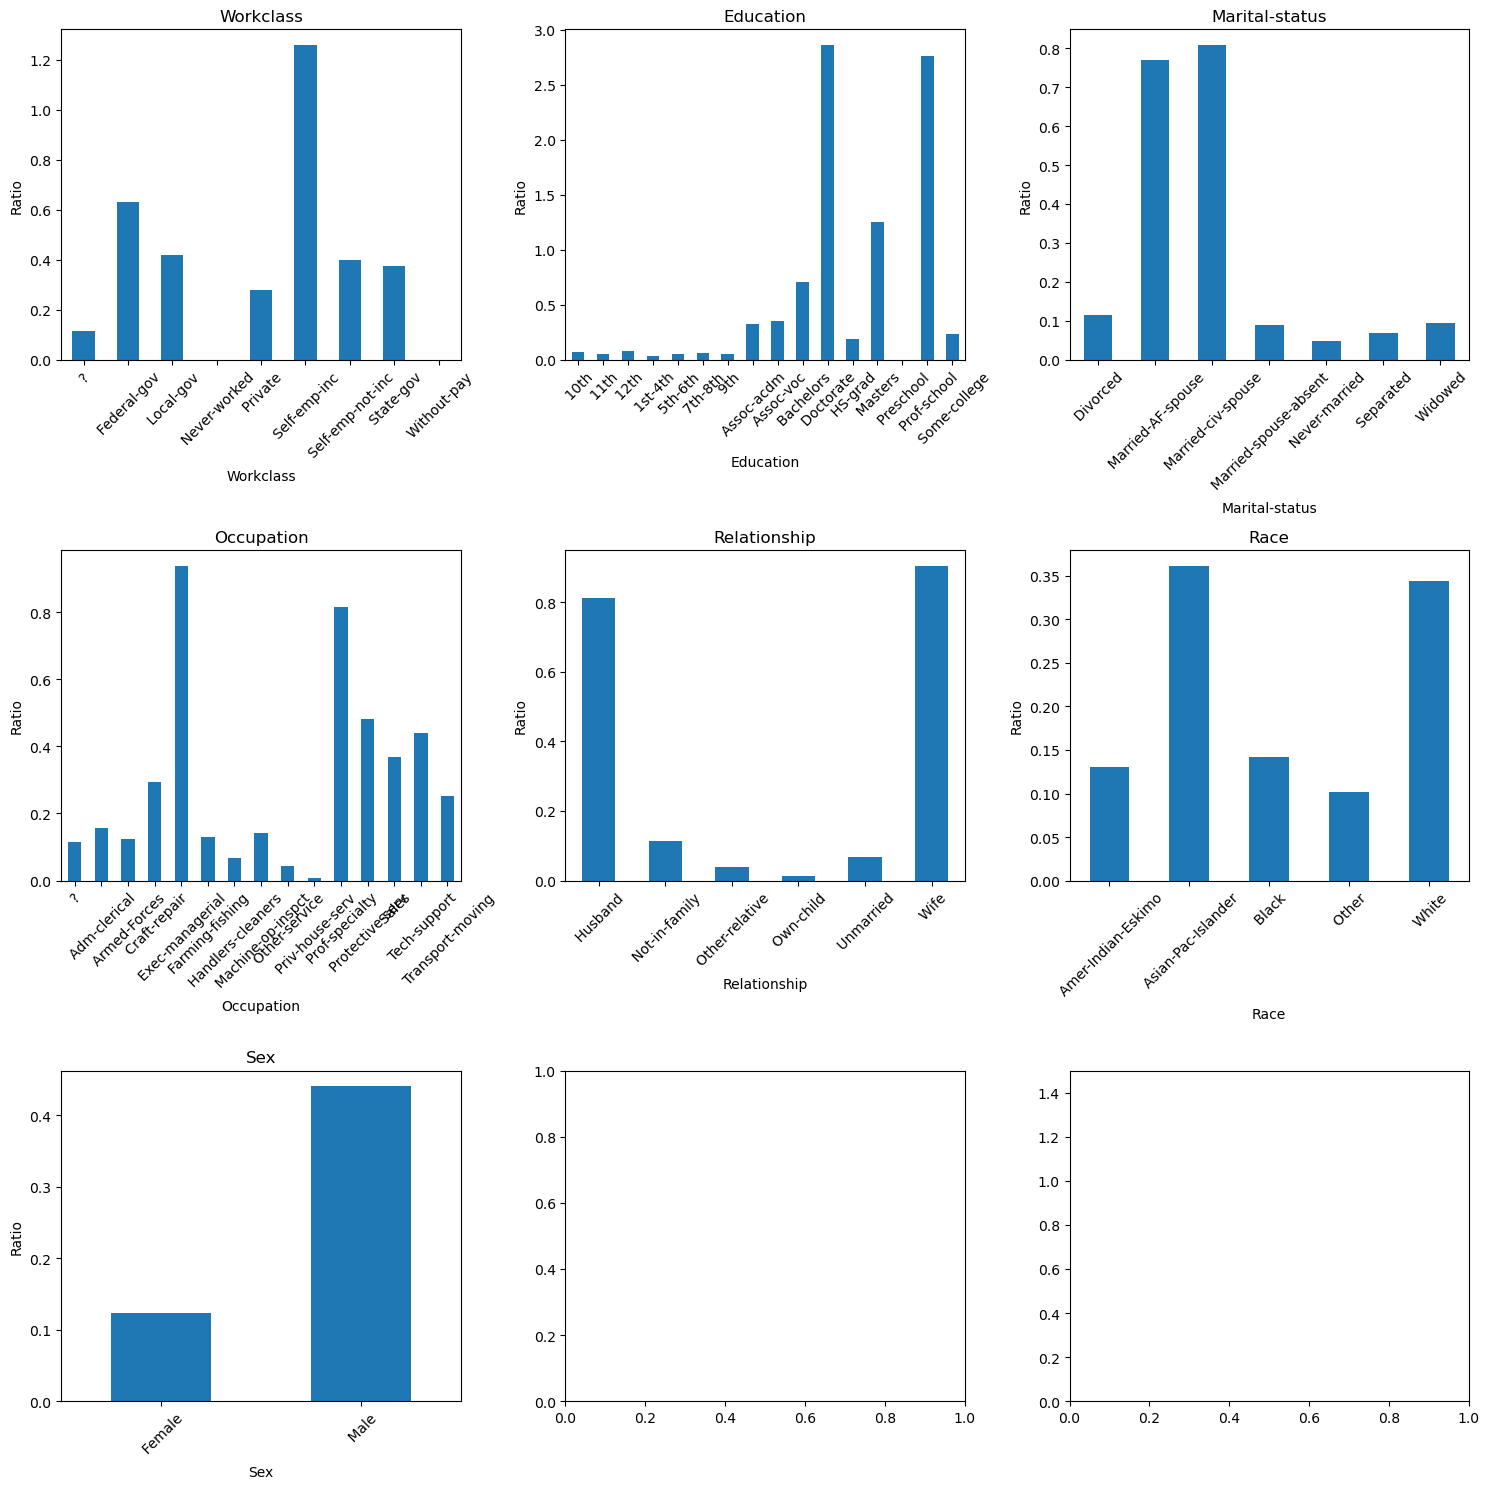

In [6]:
categorical_columns = ['Workclass', 'Education', 'Marital-status', 'Occupation', 
                       'Relationship', 'Race', 'Sex']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, column in enumerate(categorical_columns):
    grouped_counts = df.groupby(column)['Class-of-wage'].value_counts().unstack()
    Ratio = grouped_counts[' >50K'] / grouped_counts[' <=50K']
    ax = axes[i]
    Ratio.plot(kind='bar', stacked=False, ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel(f'Ratio')
    plt.ylim(0,1.5)
  #  ax.legend(['Ratio'])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Through our initial visualization, it becomes evident that certain trends emerge regarding employees' income levels across different categories. Specifically, individuals employed by the Federal Government or those who are self-employed tend to have a higher likelihood of earning more than 50K compared to other working-class categories. 

Regarding education, there is a clear correlation between higher educational attainment and higher income. Additionally, marital status appears to play a role, with individuals in relationships or married seemingly more likely to have higher earnings.

Occupation also emerges as a significant factor, with roles such as Executive Managerial and Private-house-serv indicating higher income potential.

However, disparities based on race and gender are observable. White employees and males tend to have higher earnings compared to other racial and gender groups, suggesting systemic inequalities.

It's important to note that these observations are preliminary, and further analysis is needed to understand the complex interrelationships among these attributes. Subsequent tasks will delve deeper into exploring these connections to provide more comprehensive insights. 


### Numerical Attributes

Other attributes like `Age`, and `Working Hours per week` are the numeric data. In this case, Visualize them against `Class of Wages` using Box-Plot is the best method. 

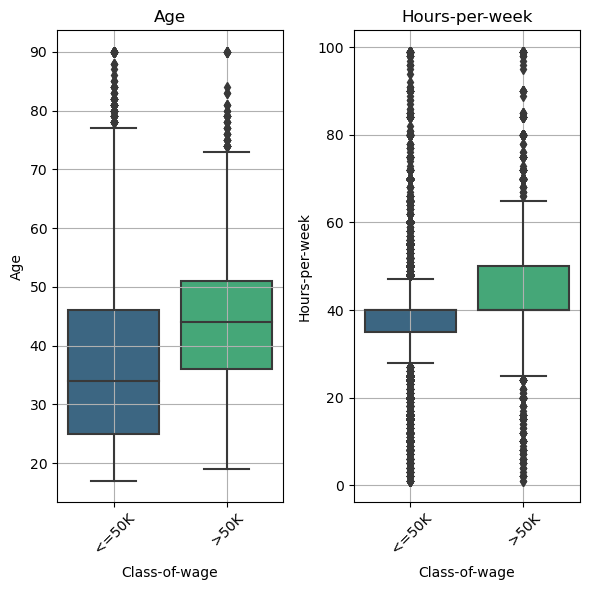

In [7]:
numeric_columns = ['Age', 'Hours-per-week']

fig, axes = plt.subplots(1, 2, figsize=(6, 6))
axes = axes.ravel()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.boxplot(x='Class-of-wage', y=column, data=df, palette='viridis', ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel('Class-of-wage')
    ax.set_ylabel(column)
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The box plots above reveal the disparity in earnings or salaries attributed to `Age` and `Working hours per week`. Typically, older individuals tend to earn more due to their accumulated experience in the workforce. However, the key takeaway here is the *significance of hard work*. Those who put in more hours per week, particularly exceeding the standard 40 hours, are likely to see an increase in their salaries.

## Task 5 – EDA and Preprocessing

Up to this point, we've imported the dataset into a Pandas DataFrame and visualized its attributes based on `Class of Wages`. Through this exploration, we've identified certain attributes that may not be highly conducive to clustering analysis and could introduce considerable noise during dimensionality reduction. Consequently, it's advisable to exclude the columns `fnlwgt`, `Education-num`, `Capital-gain`, `Native Country` and `Capital-loss`.

In [8]:
columns_to_drop = ['fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Native-country']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

Age          Workclass   Education       Marital-status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Hours-per-week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

  Class-of-wage  
0         <=50K  
1         <=50K  
2         <=50K  
3         <=50K  
4         <=50K

Preprocessing the Data is required before further process to Clustering. Here we need to convert the categorical attributes into the numerical attributes. For this, `LabelEncoder` has been implemented to transform the data.

In [9]:
'''  Convert the categorical dataset into Numeric and Print the Conversion
'''
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = ['Workclass', 'Education', 'Marital-status', 'Occupation', 
                       'Relationship', 'Race', 'Sex', 'Class-of-wage']

category_to_numeric = {}

# Apply label encoding to each categorical column and store the mappings
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    category_to_numeric[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for column, mapping in category_to_numeric.items():
    print(f"Column: {column}")
    for category, numeric_value in mapping.items():
        print(f"   {category} -> {numeric_value}")


Column: Workclass
    ? -> 0
    Federal-gov -> 1
    Local-gov -> 2
    Never-worked -> 3
    Private -> 4
    Self-emp-inc -> 5
    Self-emp-not-inc -> 6
    State-gov -> 7
    Without-pay -> 8
Column: Education
    10th -> 0
    11th -> 1
    12th -> 2
    1st-4th -> 3
    5th-6th -> 4
    7th-8th -> 5
    9th -> 6
    Assoc-acdm -> 7
    Assoc-voc -> 8
    Bachelors -> 9
    Doctorate -> 10
    HS-grad -> 11
    Masters -> 12
    Preschool -> 13
    Prof-school -> 14
    Some-college -> 15
Column: Marital-status
    Divorced -> 0
    Married-AF-spouse -> 1
    Married-civ-spouse -> 2
    Married-spouse-absent -> 3
    Never-married -> 4
    Separated -> 5
    Widowed -> 6
Column: Occupation
    ? -> 0
    Adm-clerical -> 1
    Armed-Forces -> 2
    Craft-repair -> 3
    Exec-managerial -> 4
    Farming-fishing -> 5
    Handlers-cleaners -> 6
    Machine-op-inspct -> 7
    Other-service -> 8
    Priv-house-serv -> 9
    Prof-specialty -> 10
    Protective-serv -> 11
    Sales -> 12


Certain attributes contain unknown variables, such as `?` in `Workclass` and `Occupation`. Therefore, it's imperative to eliminate such noise by removing these variables from the dataset.

In [10]:
df = df[df['Workclass'] != 0]
df = df[df['Occupation'] != 0]
df.head()

Age  Workclass  Education  Marital-status  Occupation  Relationship  Race  \
0   39          7          9               4           1             1     4   
1   50          6          9               2           4             0     4   
2   38          4         11               0           6             1     4   
3   53          4          1               2           6             0     2   
4   28          4          9               2          10             5     2   

   Sex  Hours-per-week  Class-of-wage  
0    1              40              0  
1    1              13              0  
2    1              40              0  
3    1              40              0  
4    0              40              0

In [11]:
print (df.columns)
df.shape

Index(['Age', 'Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Hours-per-week', 'Class-of-wage'],
      dtype='object')


(30718, 10)

## Task 6 – Clustering

#### Clustering: <br>

In this initial experiment, we aim to conduct clustering on our preprocessed datasets utilizing two algorithms: `k-means` clustering and the `Expectation Maximization` algorithm.

The first algorithm employed is k-means clustering, which iteratively partitions our data by initially selecting `k` random centers, assigning each point to the closest center, recalculating the centers by averaging the points within each cluster, and repeating these steps until convergence.

On the other hand, the Expectation Maximization algorithm establishes `soft` boundaries between clusters, assigning each point a probability of belonging to a particular Gaussian distribution. This process involves calculating the expectation or likelihood of each point being generated by a component of the model and then adjusting the parameters to maximize the likelihood of the data given the assignments.

During the clustering process, our primary considerations include determining the optimal value of k, representing the number of clusters present in our data, and selecting an appropriate parameters for assigning points to the closest centers.


**KMean Parameterization:** In this project, we have initially considered some parameters that we are going to stick with the rest of the work. Here are some parameters; 

     1) init='k-means++': This parameter specifies the method for initializing the centroids (cluster centers) in KMeans. It is a recommended initialization strategy because it helps KMeans converge faster and often leads to better clustering results.

     2) n_init='auto': This parameter controls how many times KMeans will run with different random initializations. 'auto' is a good default because it sets n_init to 10 for 'k-means++' initialization. Running KMeans multiple times with different initializations can help avoid getting stuck in local minima (suboptimal solutions) and increase the chances of finding a better overall clustering.
     
     3) random_state=42: This parameter sets a seed for the random number generator used during KMeans initialization. By setting a fixed seed (e.g., 42), we ensure reproducibility of the results.

**Expectation Maximization Parameterization:** The parameters (covariance_type='full', random_state=3) are both relevant for model behavior and achieving reproducible results. Here's a breakdown of their importance:

    1) covariance_type='full': This parameter specifies the type of covariance matrix used for each component (cluster) in the GMM. 'full' indicates that a full covariance matrix will be used. This means the covariance matrix will capture all possible covariances between features within each component.

    2) random_state=3: This parameter sets a seed for the random number generator used during EM parameter initialization in GMM. By setting a fixed seed (e.g., 3), we ensure reproducibility of our results.

In [12]:
''' Import necessary Libraries
'''
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score


In [13]:
X = df.values[:,:-1]
y = df.values[:,-1]

# Normalizing the dataset
scaler = StandardScaler()
# Fitting on the training data
scaler.fit(X, y)
# Applying transformation to the training and test data
X = scaler.transform(X)


#### K-Means Algorithm <br>

The authentic *k* cluster is necessary for this, we apply two methods **Elbow Method** & **Silhouette Method** as below

#### 1) Elbow Method to determine *k*

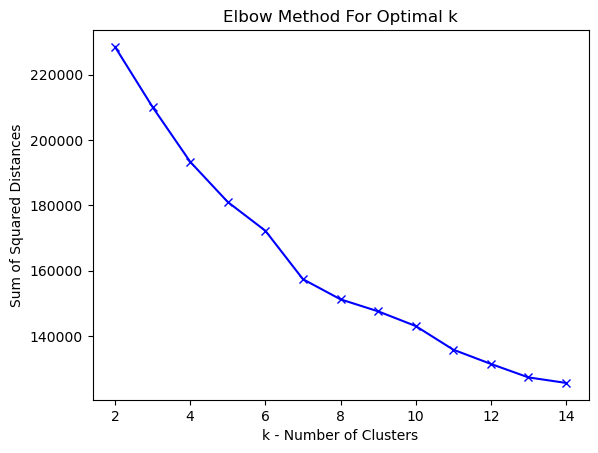

In [14]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k - Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 2) Silhouette Method to determine k

In [15]:
''' Function for Silhouette Analysis
'''

def silhouette_analysis(range_n_clusters, X, random_state):
    silhouette_avg_list = []
    for n_clusters in range_n_clusters:
        '''
        The silhouette coefficient can range from -1, 1.
        where a high value indicates that the object is well matched to its own cluster 
        and poorly matched to neighboring clusters.
        '''
        # Initialize the clusterer with n_clusters value
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto',random_state=random_state)     
        cluster_labels = clusterer.fit_predict(X)

        '''
        The silhouette_score gives the average value for all the samples.
        This gives a perspective into the density and separation of the formed
        clusters.
        '''
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avg_list.append(silhouette_avg)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("Silhouette plot with n_clusters = %d" % n_clusters)
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.show()
    
    ''' Silhouette Scoring Plot for all the n_clusters
    '''
    
    max_idx = silhouette_avg_list.index(max(silhouette_avg_list))
    plt.clf()
    plt.plot(range_n_clusters, silhouette_avg_list, 'bx-')
    plt.plot(range_n_clusters[max_idx], silhouette_avg_list[max_idx], 'rx-')
    plt.title("Silhouette scores")
    plt.ylabel("Silhouette Score")
    plt.xlabel("Number of clusters")
   # plt.savefig('Silhouette_scores.png')
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.19628485401699072


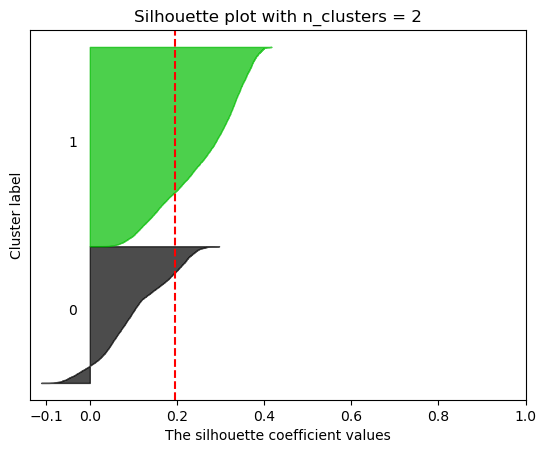

For n_clusters = 3 The average silhouette_score is : 0.14976981938506856


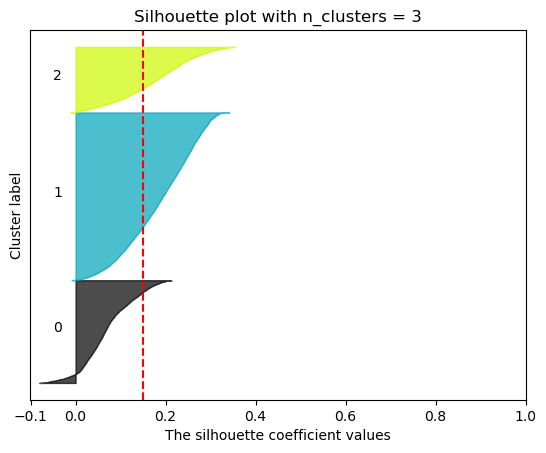

For n_clusters = 4 The average silhouette_score is : 0.17141328273883877


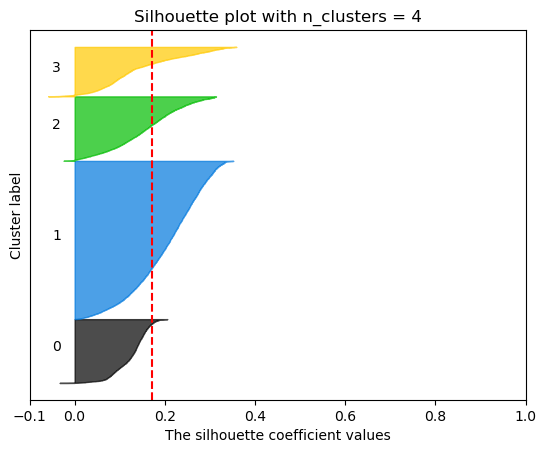

For n_clusters = 5 The average silhouette_score is : 0.14781025759086264


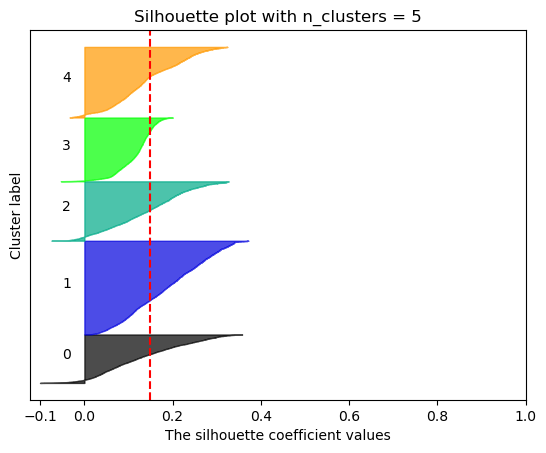

For n_clusters = 6 The average silhouette_score is : 0.14589438468896318


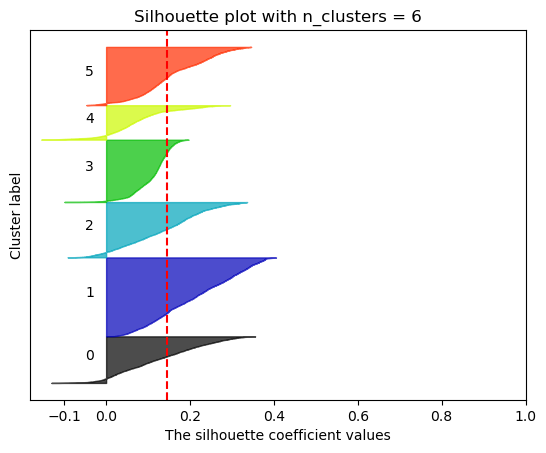

For n_clusters = 7 The average silhouette_score is : 0.15378123152096207


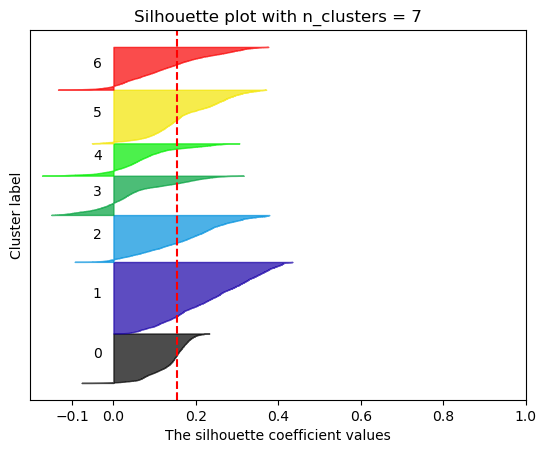

For n_clusters = 8 The average silhouette_score is : 0.16485729967067556


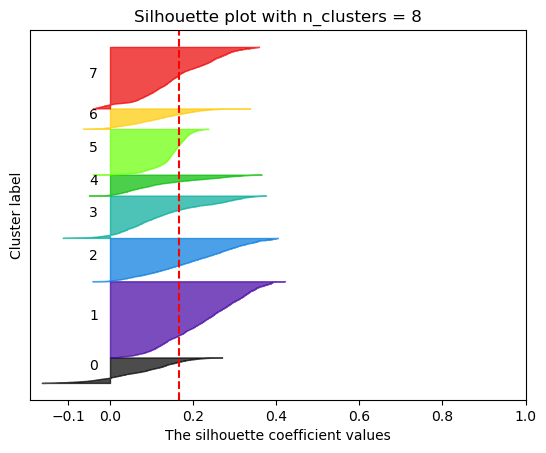

For n_clusters = 9 The average silhouette_score is : 0.16223529303647743


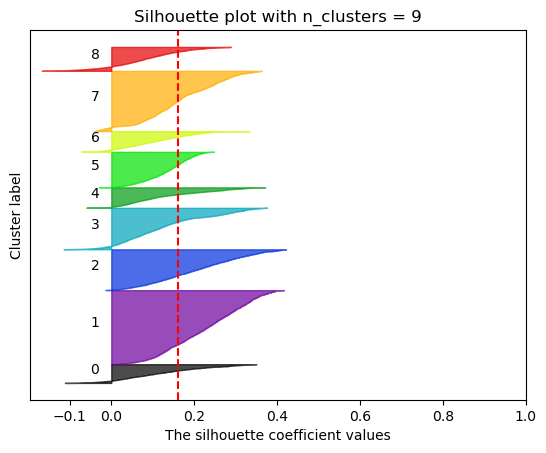

For n_clusters = 10 The average silhouette_score is : 0.16339753166289833


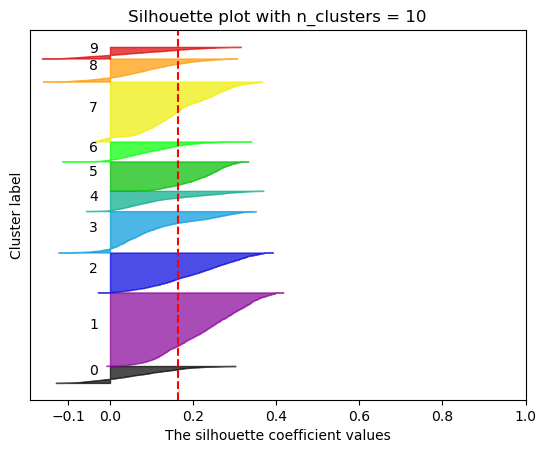

For n_clusters = 11 The average silhouette_score is : 0.16303661118272653


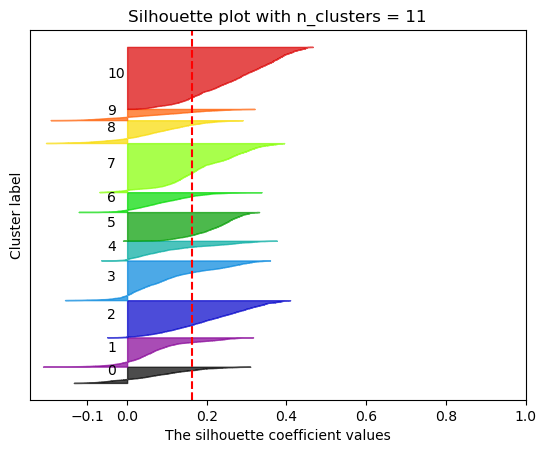

For n_clusters = 12 The average silhouette_score is : 0.16162125097983554


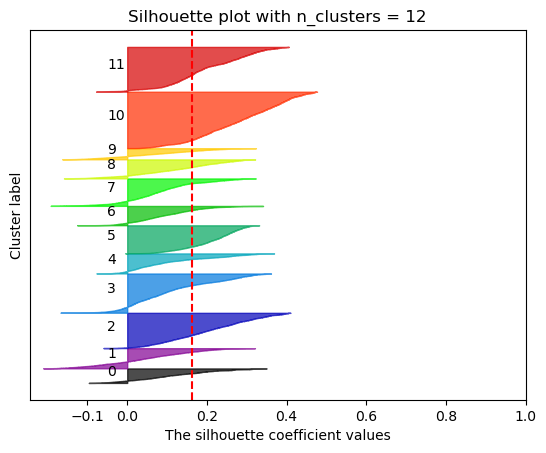

For n_clusters = 13 The average silhouette_score is : 0.16665698266669646


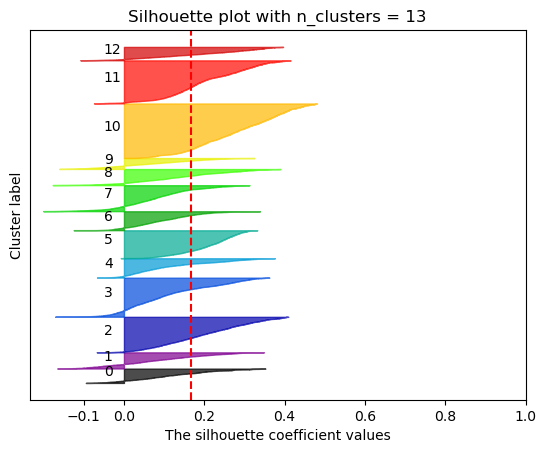

For n_clusters = 14 The average silhouette_score is : 0.1673973725330681


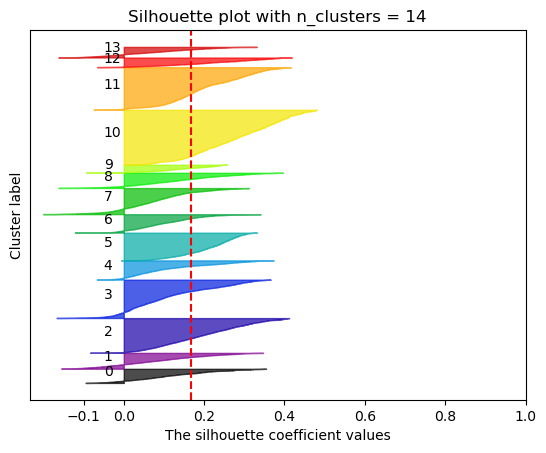

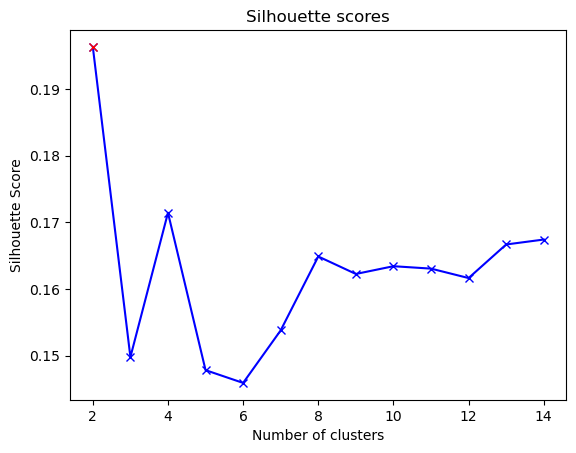

In [16]:
range_n_clusters = range(2,15)
silhouette_analysis(range_n_clusters, X, 42)

Initially, we apply k-means clustering to the dataset, aiming to partition samples into groups with equal variance while minimizing the inertia or within-cluster sum of squares. Our objective is to ascertain the optimal value for k, representing the number of clusters.

One method to determine this optimal k is through the elbow method. Here, we plotted the within-cluster sum of squared error, which characterizes explained variances against the number of clusters. Initially, smaller cluster numbers yield higher error, indicating less variance explanation. However, as the cluster number increases, the error diminishes, leading to a noticeable angle in the graph, known as the "elbow" point. At this juncture, the gain in error reduction becomes marginal, suggesting an optimal number of clusters.

In some instances, identifying the elbow point may not be straightforward, as illustrated in the plots for our dataset. In such case, we employ silhouette analysis to evaluate the separation distance between clusters. Silhouette scores range from -1 to +1, where a score of +1 indicates that the sample is distinctly separated from neighboring clusters, 0 suggests proximity to the boundary, and negative values imply potential misassignments.

Our objective is to maximize the silhouette score to determine the optimal k. Upon analyzing the plot of our dataset, we conclude that the optimal value for k-means clustering is **k = 2**.

#### Expectation Maximization Algorithm

We proceed to apply the Expectation Maximization (EM) algorithm to our dataset utilizing the GaussianMixture implementation provided by sklearn. Our primary objective is to determine the optimal number of Gaussian components, which correspond to clusters, for the EM algorithm.

To achieve this, we employ two commonly used criteria: the Bayesian Information Criterion (BIC) and the Akaike Information Criterion (AIC). These metrics aid in selecting the number of components in a Gaussian Mixture model by evaluating the trade-off between model complexity and goodness of fit. The optimal number of clusters is determined when the BIC/AIC value is minimized.

Furthermore, we can visualize the Log Likelihood versus the number of components and inspect for an elbow or maximum point. This inflection point corresponds to the optimal number of clusters, indicating the point at which the model captures the most information while avoiding overfitting.

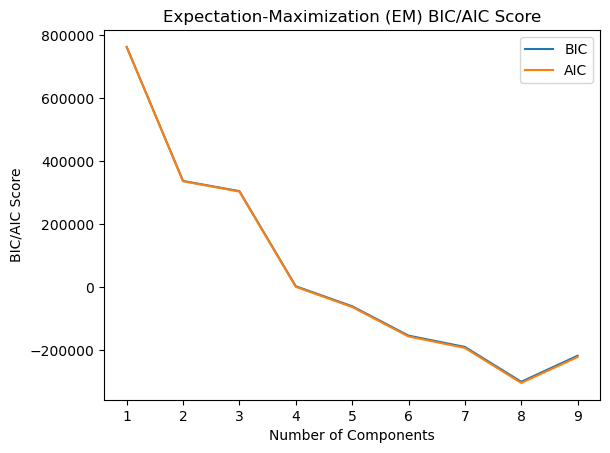

In [17]:
num_components = np.arange(1, 10)
estimators = [GaussianMixture(n, covariance_type='full', random_state=3).fit(X)
              for n in num_components]

plt.plot(num_components, [estimator.bic(X) for estimator in estimators], label='BIC')
plt.plot(num_components, [estimator.aic(X) for estimator in estimators], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of Components')
plt.ylabel('BIC/AIC Score')
plt.title('Expectation-Maximization (EM) BIC/AIC Score')
plt.show()


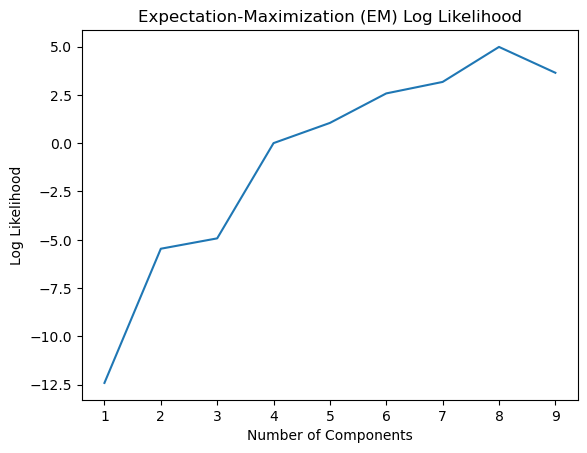

In [18]:
log_likelihood = np.zeros(9)

num_components = np.arange(1,10)
models = []
# Loop through each number of Gaussians and compute the Log Likelihood, and save the model
for i, components in enumerate(num_components):
    # Create Gaussian Mixture Model with 'components' number of components
    gmm = GaussianMixture(n_components=components, covariance_type='full', random_state=3)
    # Fit the model to the data
    gmm.fit(X)
    # Compute the Log Likelihood for this model
    log_likelihood[i] = gmm.score(X)
    # Add the best-fit model with 'components' components to the list of models
    models.append(gmm)

plt.plot(num_components, log_likelihood)
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.title('Expectation-Maximization (EM) Log Likelihood')
plt.show()


Observation from the image shows the optimal number of clusters for the dataset is **k = 8** when Log Likelihood is maximal, and BIC/AIC is minimal.

### Visualizing the Cluster

Let's examine the outcomes of clustering to assess the efficacy of these algorithms. To facilitate visualization, we employ t-SNE, a dimensionality reduction technique available in sklearn, which projects our high-dimensional dataset onto a 2D space. This enables us to gain insights into the structure of the data and the clustering patterns achieved by the algorithms.

In [19]:
''' Import necessary Libraries
'''
from sklearn.manifold import TSNE


#### Ground Truth Class Labels grouping

In [17]:
training_x2D = TSNE(verbose=False, random_state=10).fit_transform(X)

In [24]:
def visualization(method, x2D, y, title):
    ds_2d = pd.DataFrame(np.hstack((x2D, np.atleast_2d(y).T)),
                                 columns=['x', 'y', 'target'])
    df = ds_2d
    possible_clusters = list(set(df['target']))

    plt.gca()
    plt.title(title)
    if method == 'Kmeans' or method == 'Actual_Labels':
        plt.scatter(df['x'], df['y'], c=np.where(df['target'] == 1, 'yellow', 'purple'), alpha=0.7, s=5)
    else:
        plt.scatter(df['x'], df['y'], c=df['target'], alpha=0.7, s=5)        
    plt.xticks([])
    plt.yticks([])
    plt.grid(None)
    plt.axis('tight')
    plt.show()

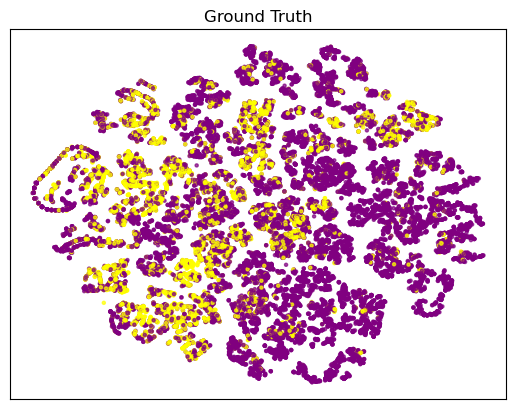

In [25]:
visualization('Actual_Labels',training_x2D, y, 'Ground Truth')

#### 1) K-Mean clustering with **k=2**

In [26]:
km = KMeans(n_clusters=2, init='k-means++',n_init='auto',random_state=42)
km = km.fit(X)
y_pred_kmean = km.labels_
df['y_pred_kmean_actualdata'] = km.labels_

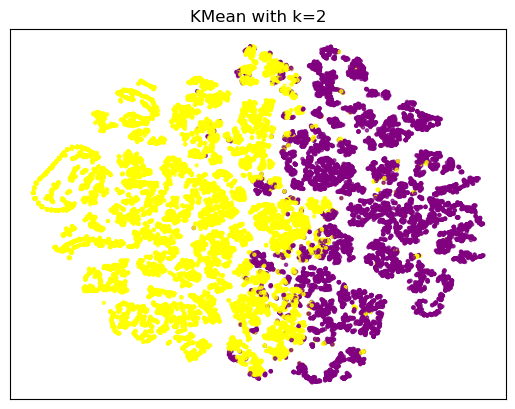

In [28]:
visualization('Kmeans',training_x2D, y_pred_kmean, 'KMean with k=2')

#### 2) Expectation Maximization

In [22]:
gmm = GaussianMixture(n_components=8, covariance_type='full', random_state=3)
gmm = gmm.fit(X)
y_pred_EM = gmm.predict(X)

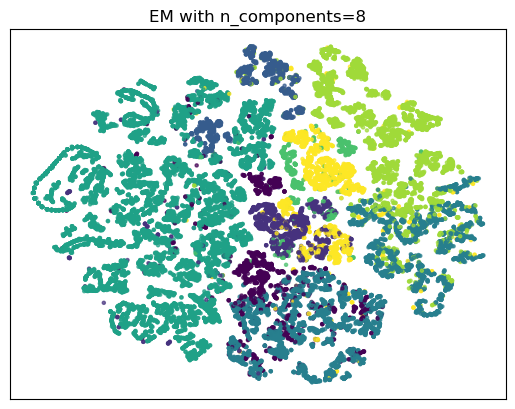

In [29]:
visualization('EM',training_x2D, y_pred_EM, 'EM with n_components=8')

In the visualizations, we initially present the ground truth labels of the dataset. Additionally, we depict the clustering results obtained from both the k-means and EM algorithms. Upon observation, we notice that k-means algorithm successfully generate clusters that closely correspond to the ground truth labels.

K-means demonstrates effectiveness in separating the clusters in a manner that aligns with the actual labels. However, it's important to note that while the *clusters generated by k-means and EM don't precisely match the true labels, they effectively segment the data based on certain discernible characteristics.*

For instance, the left-side of the ground truth label is distinctly represented by a single cluster in both k-means and EM results. Conversely, the large, dispersed purple cluster is segmented into multiple smaller clusters, indicating a limitation in properly classifying this cluster, particularly evident in the EM results.

Despite these discrepancies, the clustering outcomes appear to align with the ground truth labels because each individual possesses distinct characteristics. These shared characteristics contribute to the formation of multiple clusters, which, when combined, closely resemble the true labels.

**In the conclusion of *Task 6*, we refer *k-means* algorithm with total clusters = 2 as one of the best representation of actual labels that would be used in the next tasks.**

## Task 7 – Dimensionality Reduction

In Principal Component Analysis (PCA), we aim to simplify complex data by finding a smaller set of new features that capture the most important information. These new features, called components, represent the directions of greatest variation in the data and are independent of each other. By keeping only the most significant components, we can create a "compressed" version of the data that retains the essential structure. This approach allows us to reduce data complexity while maximizing the information we preserve, making PCA a valuable tool for various data analysis tasks.

PCA authenticity lies on eigenvectors and eigenvalues that recovering structure in our data and finding the principal component of maximal variance. It has one important property, if we were to get rid of some of the dimensions, and we make certain they are with the lowest eigenvalues (variance), we are guaranteed that this subspace maximizes reconstruction. This is what we will use to find the optimal number of components. 


In [20]:
''' Import necessary Libraries
'''
from sklearn.decomposition import PCA

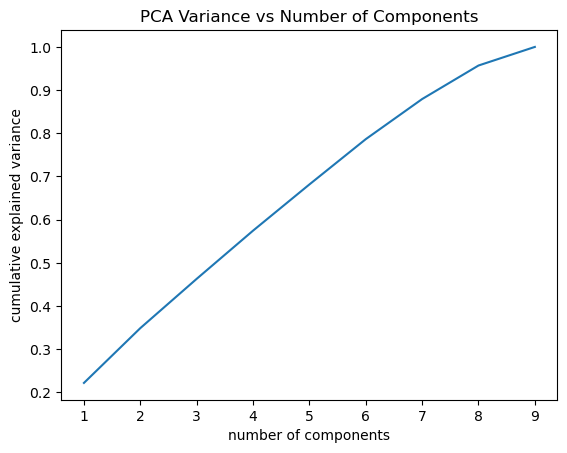

In [21]:
pca = PCA().fit(X)
plt.plot(range(1,X.shape[1]+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA Variance vs Number of Components")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

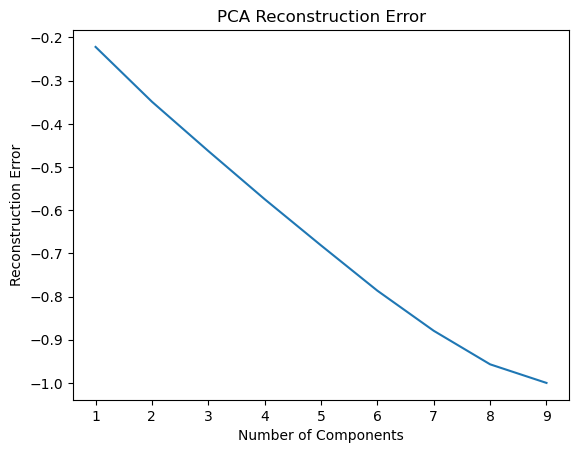

In [22]:
recon_error = []
    
for i in range(1, X.shape[1]+1):
    pca = PCA(n_components=i)
    pca_projected_adult = pca.fit_transform(X)
    error = (X - pca.inverse_transform(pca_projected_adult) ** 2).mean()
    recon_error.append(error)

plt.plot(range(1,X.shape[1]+1), recon_error)

plt.title("PCA Reconstruction Error")
plt.ylabel("Reconstruction Error")
plt.xlabel("Number of Components")
plt.show()

We make a variance vs number of components plot, where we can observe that the distribution of eigenvalues increases as the number of components increases. Ideally to find the optimal number of components, we want one that can capture more than 70% of the variance. For the dataset by using the first 5 principal components we explain ~70% of the variance. We choose these as the optimal number of components for dataset. So now we zero out the remaining smallest principal components, 
resulting in a lower-dimensional projection of the data preserving the maximal variance. We can also observe that the reconstuction error decreases as the number of principal components increases. 

#### Dimension Reduction to n_components = 5

In [23]:
pca = PCA(n_components=5) 
pca_projected = pca.fit_transform(X)
print(X.shape)
print(pca_projected.shape)


(30718, 9)
(30718, 5)


#### Verify # of clusters by PCA

For n_clusters = 2 The average silhouette_score is : 0.2615175951212622


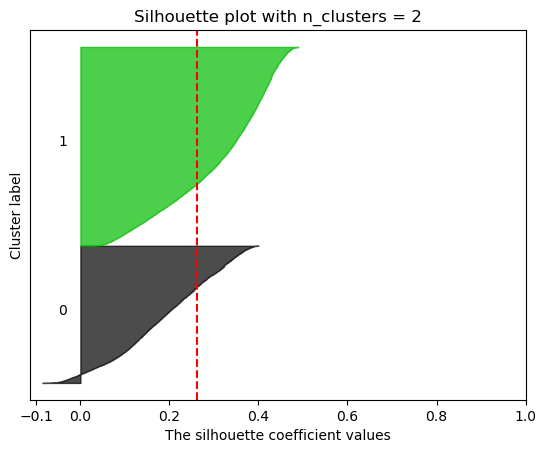

For n_clusters = 3 The average silhouette_score is : 0.17235362629241474


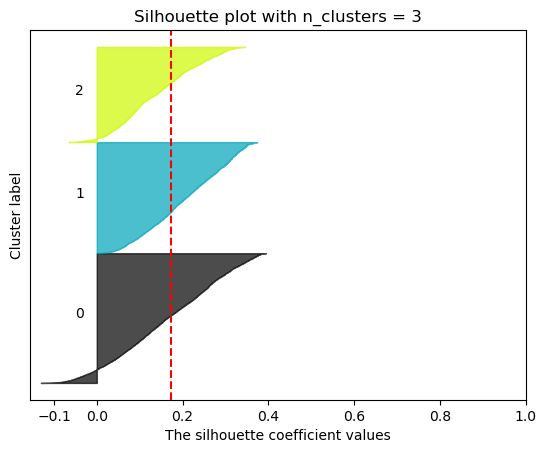

For n_clusters = 4 The average silhouette_score is : 0.17717788648821156


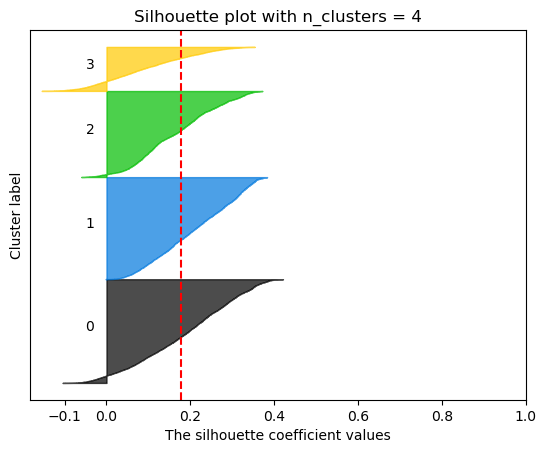

For n_clusters = 5 The average silhouette_score is : 0.19638300851396093


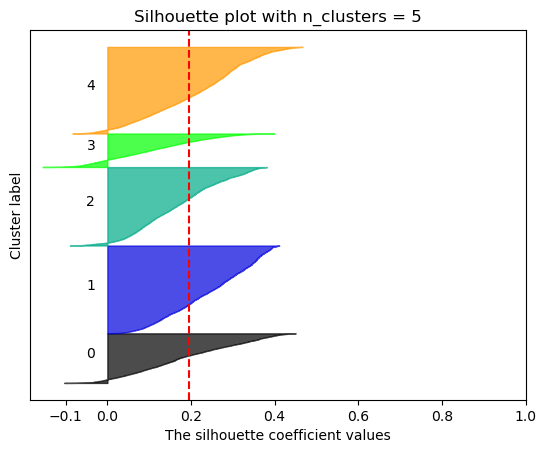

For n_clusters = 6 The average silhouette_score is : 0.20197964993722728


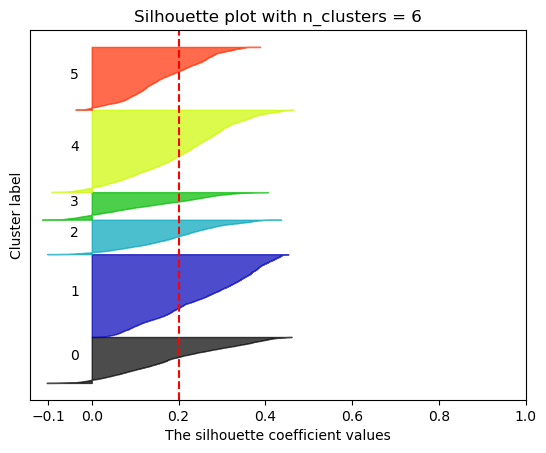

For n_clusters = 7 The average silhouette_score is : 0.21253348696008514


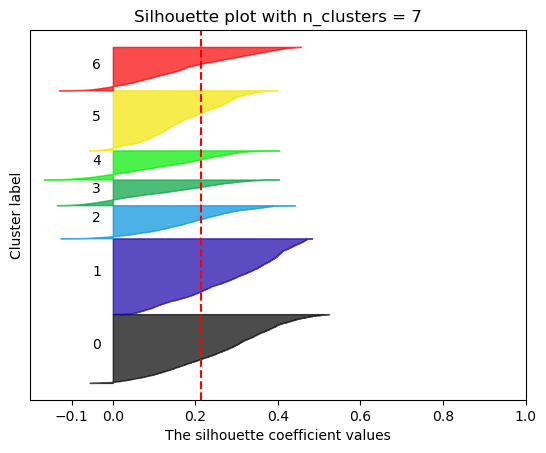

For n_clusters = 8 The average silhouette_score is : 0.200306218558507


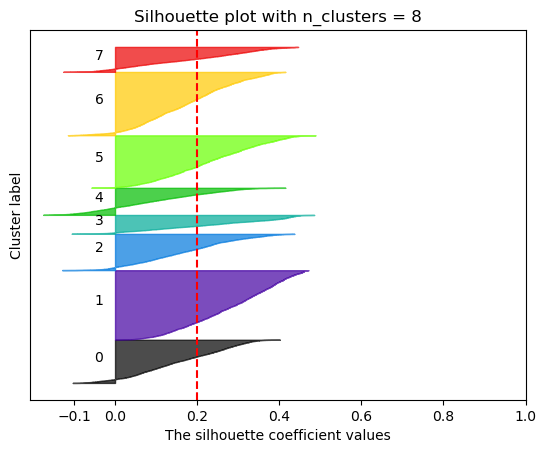

For n_clusters = 9 The average silhouette_score is : 0.19986403570926822


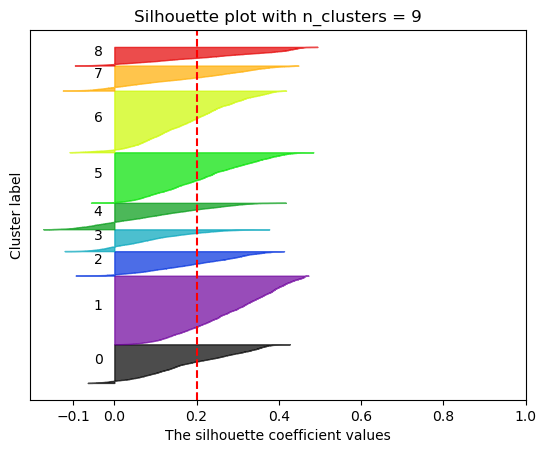

For n_clusters = 10 The average silhouette_score is : 0.20509373258799182


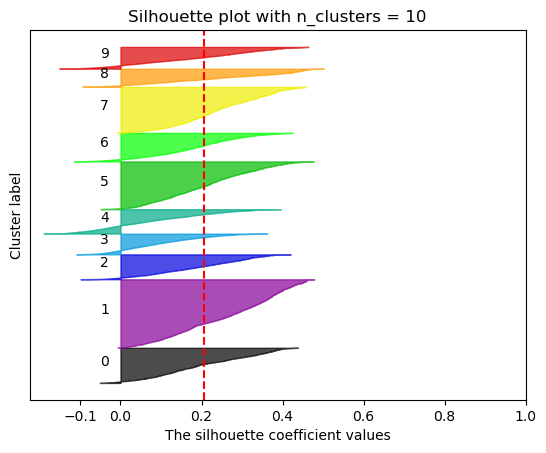

For n_clusters = 11 The average silhouette_score is : 0.21475153321567592


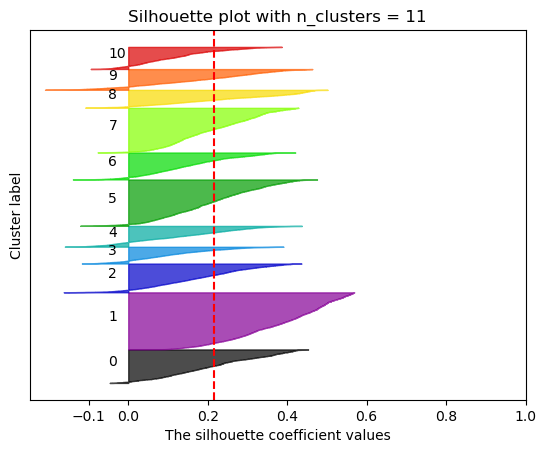

For n_clusters = 12 The average silhouette_score is : 0.2155255475026082


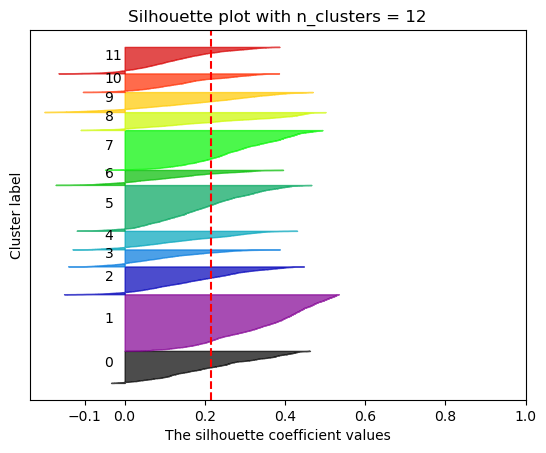

For n_clusters = 13 The average silhouette_score is : 0.20549907709189033


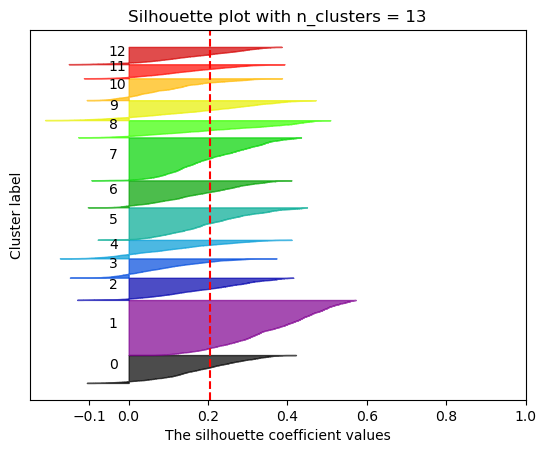

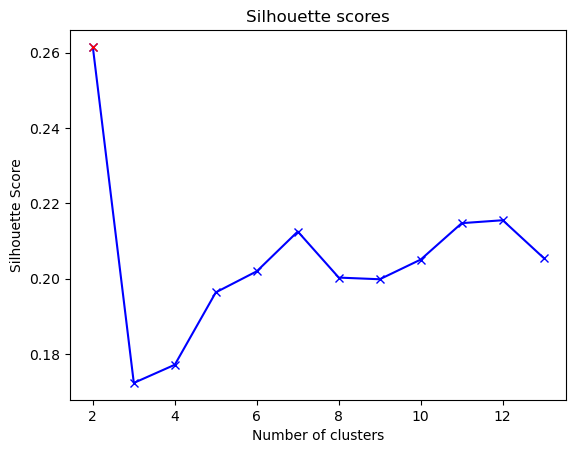

In [25]:
range_n_clusters = range(2,14)
silhouette_analysis(range_n_clusters, pca_projected, 42)

we can observed the plots for the dataset. For k-means, We run the silhouette analysis, and confirmed that the optimal number of clusters is indeed 2 after the dimension reduction.

#### Apply *k*-means with Clusters = 2 on PCA

In [26]:
km = KMeans(n_clusters=2, init='k-means++', n_init='auto',random_state=42)
km = km.fit(pca_projected)
y_pred_PC = km.labels_
df['y_pred_kmean_PCA'] = km.labels_

#### Visualizing the PCA clustering

In [33]:
training_x2D = TSNE(verbose=False, random_state=10).fit_transform(pca_projected)

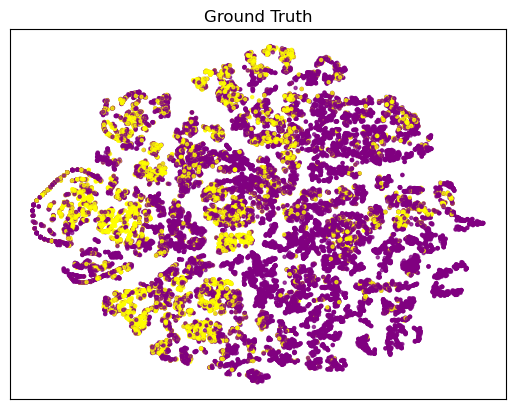

In [34]:
visualization('Actual_Labels',training_x2D, y, 'Ground Truth')

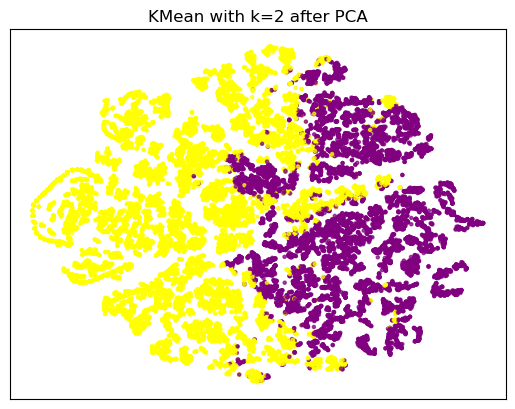

In [35]:
visualization('Kmeans',training_x2D, y_pred_PC, 'KMean with k=2 after PCA')

With five principal components explaining 70% of the original data variance, K-means clustering identifies two clusters, a result confirmed by silhouette analysis. These clusters closely resemble those generated by the original dataset. Visualizing the clusters with t-SNE reveals that the PCA-generated clusters align closely with those from Task 6. Although there is slight overlap between the left-hand cluster and the territory of the second cluster, overall, the clusters effectively represent the actual labels.

## Task 8 – Cluster Interpretation

We opted to conduct both k-means clustering (with 2 clusters) and expectation maximization (EM) clustering (with 8 components). After evaluating the results, we found that the k-means clustering closely aligns with the actual labels denoting employees earning either less or more than $50,000 annually. This alignment indicates the effectiveness of k-means in capturing the underlying structure of the data based on this binary classification.

To further refine our analysis, we proceeded to apply principal component analysis (PCA) to the dataset. We selected the top 5 principal components, which collectively explain 70 percent of the variance in the original dataset. Our rationale for choosing PCA is twofold: first, it enables dimensionality reduction, which can enhance computational efficiency and mitigate the curse of dimensionality. Second, PCA retains the essential information contained in the data while reducing noise and redundancy.

Upon applying PCA, we observed that the clustering results obtained with k-means (with 2 clusters) on the reduced-dimensional data closely mirror those obtained using the original dataset. This consistency suggests that PCA effectively preserves the key patterns and structures present in the data while reducing its dimensionality. By leveraging PCA, we achieve comparable clustering performance with fewer dimensions, thereby simplifying subsequent analyses and interpretations.

Overall, we favor the PCA approach due to its ability to reduce the complexity of the dataset while retaining its essential characteristics. This enables us to achieve efficient clustering results that closely align with the ground truth labels, facilitating clearer insights and decision-making processes.

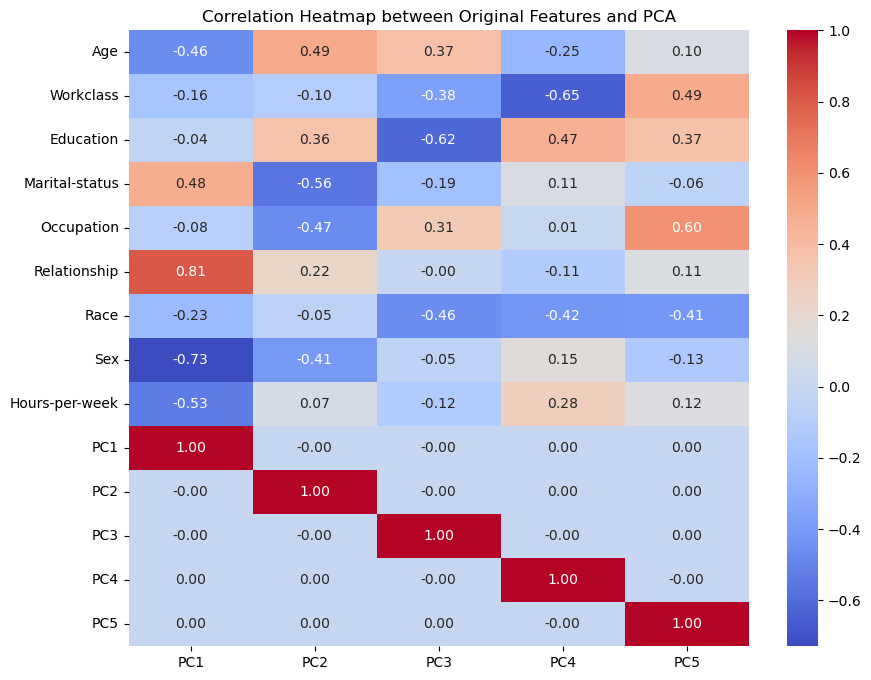

In [27]:
pca = PCA(n_components=5) 
principal_components = pca.fit_transform(X)

# Create DataFrame for principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
X_df = pd.DataFrame(X, columns=['Age', 'Workclass', 'Education', 'Marital-status', 'Occupation','Relationship', 'Race', 'Sex', 'Hours-per-week']) if not isinstance(X, pd.DataFrame) else X
selected_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

# Compute correlation between original features and principal components
correlation_matrix_filtered = pd.concat([X_df, pc_df], axis=1).corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered[selected_columns], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Original Features and PCA')
plt.show()


The correlation matrix between the original attributes and principal components reveals significant relationships. The principal components effectively represent the original attributes. We apply a correlation coefficient threshold of [-0.50, +0.50] to identify meaningful correlations. For instance, PC1 exhibits a strong positive correlation with 'Relationship' and notable negative correlations with 'Sex' and 'Working Hours per week'. Similarly, PC2 reflects 'Marital Status', PC3 corresponds to 'Education', PC4 associates with 'Workclass', and PC5 is linked to 'Occupation'. However, attributes like 'Age' and 'Race' are not well explained by these components.

Utilizing PCA has effectively reduced dimensionality, thereby enhancing cluster visibility, which could facilitate clustering experiments. Let's replicate the clustering analysis and discuss the findings. Below are the plots illustrating the determination of the optimal number of clusters using k-means on the PCA-reduced data.

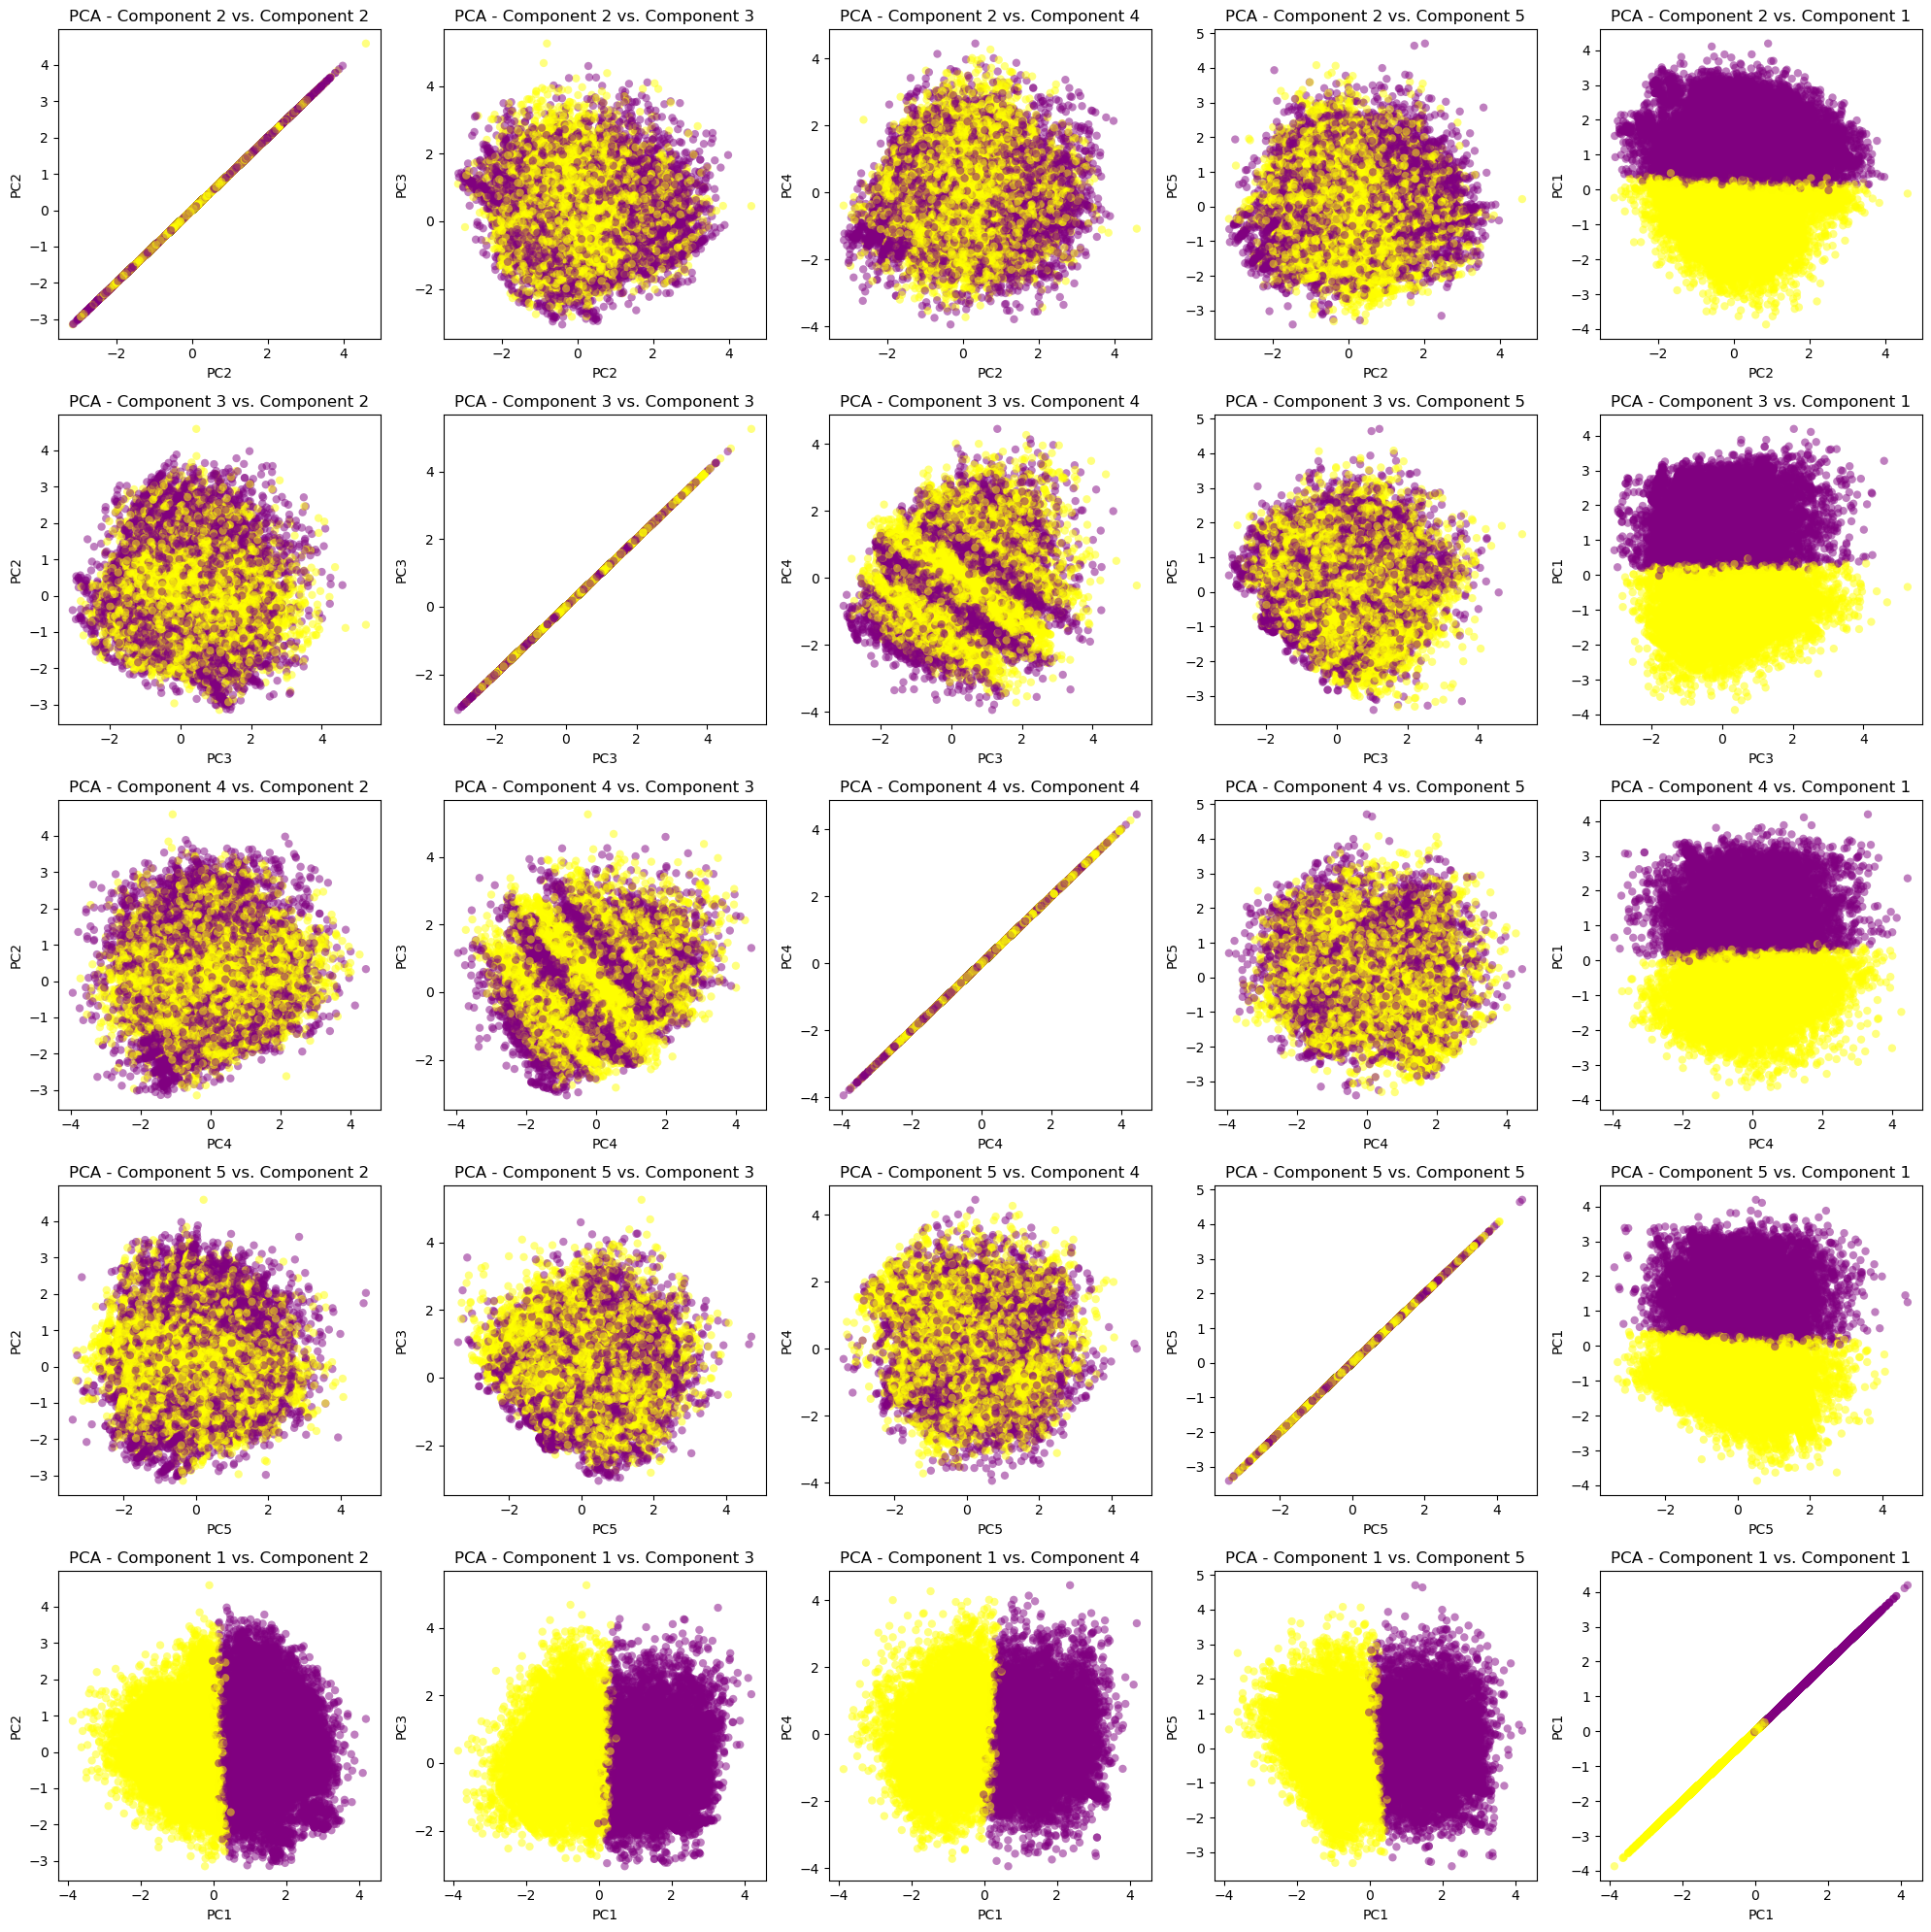

In [28]:
# Define the number of components
n_components = pca_projected.shape[1]

fig, axes = plt.subplots(n_components , n_components , figsize=(20, 20))  

# Loop through components (excluding the first one for x-axis)
for i in range(0, n_components):  
    for j in range(0, n_components):
        ax = axes[i-1, j-1]
        ax.scatter(pca_projected[:, i], pca_projected[:, j], c=np.where(km.labels_ == 1, 'yellow', 'purple'), edgecolor='none', alpha=0.5)
        ax.set_title(f"PCA - Component {i+1} vs. Component {j+1}")
        ax.set_xlabel(f'PC{i+1}')
        ax.set_ylabel(f'PC{j+1}')  

plt.tight_layout()
plt.show()


Visualizing the five principal components sheds light on the clusters represented by yellow and purple colors. These clusters initially encapsulate similar traits found in the dataset, aligning with the labels denoting employees' earnings above or below 50K.

While several components exhibit a uniform distribution across the two clusters without clear distinction, components 4 and 3 showcase distinctive patterns within the yellow cluster, indicative of employees earning more than 50K. Component 3 and 4 showcase an inverse relationship with Education and Workclass features, respectively. A more negative PC3 suggests higher education levels among employees, correlating with higher earnings. Conversely, an increase in PC4 indicates a decrease in the yellow cluster's size, signifying a rise in employees who have either never worked or work in private sectors, resulting in a decrease in the proportion of those earning above 50K.

Meanwhile, PC1 emerges as a pivotal discriminator, exhibiting a robust positive correlation with 'Relationships' and significant negative correlations with 'Sex' and 'Working Hours per week'. PC1 effectively delineates the two clusters signifying employees' earnings, with lower PC1 values associated with a larger proportion of employees earning above 50K, and vice versa. In terms of actual features, this implies that male employees working 40+ hours a week have a greater chance of earning 50K+. These employees could potentially be husbands or single males.

Furthermore, when examining PC1 in relation to other components, the PC1 vs PC3 plot, particularly in the third quadrant, indicates a denser concentration, suggesting that educated male employees working 40+ hours a week are more likely to earn above 50K. Similarly, the PC1 vs PC5 plot, specifically in the second quadrant, reveals that male employees engaged in sales, tech support, transportation, or professional specialties tend to earn higher salaries.

## Task 9 – Conclusions and Future Work

1. **Summarize and interpret the achieved results:** The clustering analysis, particularly using K-means and EM algorithms on the dataset, revealed distinct clusters that align with the income levels of individuals. By applying PCA to reduce dimensionality and visualize clusters, we identified components that strongly correlate with certain attributes such as education level, work class, and marital status. These components provided insights into the factors contributing to higher or lower income levels. Overall, the clustering analysis successfully identified patterns within the dataset that can be associated with income levels.

2. **Comparison to the original plan (Task 1):** The results align with the expected outcomes outlined in Task 1. We aimed to cluster individuals based on their income levels using K-means and EM algorithms, and the analysis successfully achieved this goal. Additionally, the use of PCA to visualize clusters and identify important components provided deeper insights into the dataset, which was not explicitly mentioned in the original plan but proved to be valuable in understanding the data.

3. **Explanation of generated value:** The final clustering from Task 8 offers valuable insights for the organization, particularly in understanding the characteristics associated with different income levels. By identifying distinct clusters of individuals with similar attributes, the organization can tailor its strategies and services to better meet the needs of different demographic groups. For example, understanding the factors that contribute to higher income levels which is based on the Educational background, working hours, occupation of the employees. It can inform targeted interventions or programs aimed at economic empowerment.

4. **Recommendation for the organization:** Based on the results, the organization should consider implementing targeted initiatives to support individuals in lower-income clusters, focusing on areas such as education, skilling labous and access to resources. Here we have also seen a clear discrimination between the earning of Male and Female. Leveraging the insights from the clustering analysis can inform decision-making processes related to resource allocation, marketing strategies, and policy development.

5. **Reflection on limitations and pitfalls:** One limitation of the analysis is the reliance on assumptions, such as the choice of clustering algorithms that is K-Means & EM  and the interpretation of PCA components. Additionally, the clustering results may be influenced by the choice of parameters. Further the quality of the data especially the extra features that may not include in this analysis could create Pitfalls include overfitting, where the clustering may not generalize well to new data, and the potential for bias in the dataset, which can affect the clustering outcomes.

6. **Critical discussion of the methodology:** The employed methodology involved a systematic approach to clustering analysis, starting from data preprocessing to interpretation of results. However, alternative algorithms or techniques could have been explored to validate the findings and enhance the robustness of the analysis. Additionally, the interpretation of PCA components requires careful consideration and domain knowledge to ensure meaningful insights.

7. **Ideas for future work:** Future work could involve refining the clustering analysis by exploring different algorithms, parameter settings, and feature engineering techniques. For example, the alternative approach for the data preprocessing could be the removing of unnecessary data as an outliers, conversion of categorical to numeric dataset based on earning Ratio. Additionally, incorporating external datasets or additional features like Capital gain, capital loss, native countries could provide a more comprehensive understanding of income determinants. Further in this type of data, Supervised Machine learning (Logistic Regression, Decision Tree) for classification would be the better alternative. Furthermore, conducting longitudinal studies to track changes in income levels over time and evaluating the effectiveness of interventions based on clustering insights could provide valuable insights for policy-making and organizational strategies.